<a href="https://colab.research.google.com/github/Daniel-Addotei/ThriveA-ml-april-advance-2025/blob/main/dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN Clustering Tutorial _ Thrive Africa

In this notebook, you will learn about **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise), a clustering algorithm that groups together data points that are closely packed and marks as outliers points that lie alone in low-density regions.

We will:
- Explain the DBSCAN algorithm and its key parameters (`eps` and `min_samples`)
- Work with two synthetic datasets (Blobs and Moons) for clustering
- Use interactive widgets to experiment with different parameter values
- **Apply DBSCAN to a real-world problem:** Identifying crime hotspots from simulated data

Let's get started!

## Introduction to DBSCAN

**Key Concepts:**

- **Density-Based Clustering:** DBSCAN groups points that are closely packed together, while marking isolated points (in low-density regions) as noise.
- **Parameters:**
  - `eps`: The maximum distance between two samples for them to be considered as neighbors.
  - `min_samples`: The minimum number of points required in a neighborhood for a point to be considered a core point.

DBSCAN is particularly useful for data with clusters of similar density and for detecting outliers.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons, make_blobs
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [ ]:
def plot_dbscan(eps, min_samples, dataset):
    np.random.seed(42)

    # Generate dataset based on user selection
    if dataset == 'Blobs':
        X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=42)
    else:
        X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

    # Standardize the dataset
    X = StandardScaler().fit_transform(X)

    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)

    # Plot clusters
    plt.figure(figsize=(6, 6))
    unique_labels = set(labels)
    colors = [plt.cm.jet(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = (0, 0, 0, 1)  # Black color for noise points
        class_member_mask = (labels == k)
        plt.scatter(X[class_member_mask, 0], X[class_member_mask, 1],
                    c=[col], label=f'Cluster {k}' if k != -1 else 'Noise', edgecolors='k')

    plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
    plt.legend()
    plt.show()

In [ ]:
# Create interactive widgets for DBSCAN parameters
eps_slider = widgets.FloatSlider(value=0.3, min=0.1, max=1.0, step=0.05, description="Eps:")
min_samples_slider = widgets.IntSlider(value=5, min=1, max=20, step=1, description="Min Samples:")
dataset_dropdown = widgets.Dropdown(options=['Blobs', 'Moons'], value='Blobs', description="Dataset:")

display(widgets.interactive(plot_dbscan, eps=eps_slider, min_samples=min_samples_slider, dataset=dataset_dropdown))

interactive(children=(FloatSlider(value=0.3, description='Eps:', max=1.0, min=0.1, step=0.05), IntSlider(value…

## How to Use This Notebook

1. **Adjust the Parameters:** Use the sliders to modify `eps` and `min_samples`.
2. **Choose a Dataset:** Select either **Blobs** or **Moons** to see how DBSCAN performs on different data distributions.
3. **Observe the Clusters:** The notebook will update the plot in real-time, showing clusters and noise points (displayed in black).

Experiment with different parameter values to see how the clustering changes.

## Real-World Problem: Identifying Crime Hotspots

In many cities, law enforcement agencies need to identify areas with a high concentration of crimes (hotspots) and distinguish them from isolated incidents. DBSCAN is especially useful here because:

- It can detect clusters of arbitrary shape.
- It naturally identifies outliers (which might represent isolated crimes).

In the example below, we simulate crime data where clusters represent crime hotspots and random noise represents isolated events.

# 🕵️‍♂️ Real-World Example: Identifying Crime Hotspots with DBSCAN  

## 📌 1. Generating Synthetic Crime Data  

### 🔹 Hotspot Data:  
- We generate synthetic data points that simulate **crime hotspots**.  
- These represent areas where crime is frequently reported.  
- The data is created around **3 central locations** to mimic real-life crime clustering.  

### 🔹 Noise Data:  
- To simulate **isolated crimes**, we add random noise points.  
- These represent sporadic or one-off incidents that do not belong to a dense crime region.  

### 🔹 Combining Data:  
- We merge both **hotspot data** and **noise data** to create a dataset that resembles real-world crime patterns.  

---

## 📌 2. Data Standardization  

### 🔹 Why Standardize?  
- DBSCAN is **sensitive to different scales** of data.  
- Standardization ensures that all features contribute **equally** by scaling them to a common range.  
- This improves clustering performance and prevents bias towards certain features.  

---

## 📌 3. Applying DBSCAN  

### 🔹 DBSCAN Parameters:  
- **`eps` (Epsilon Distance):** Maximum distance between two points to be considered neighbors.  
- **`min_samples:`** Minimum number of points required to form a **dense region** (i.e., a cluster).  

### 🔹 How DBSCAN Works:  
- **Core Points:** Have at least `min_samples` neighbors within `eps`.  
- **Border Points:** Close to a core point but do not meet `min_samples`.  
- **Noise Points:** Points that do not belong to any cluster (often labeled as `-1`).  

### 🔹 Clustering Process:  
1. DBSCAN identifies **core points** in dense regions.  
2. It expands clusters by connecting **neighboring core points**.  
3. **Border points** are assigned to nearby clusters.  
4. **Noise points** remain unclustered.  

---

## 📌 4. Visualizing the Clusters  

### 🔹 How We Visualize:  
- We create a **scatter plot** to display the clusters.  
- Different colors represent different clusters.  
- **Noise points (outliers) are marked in black.**  

### 🔹 Key Observations:  
- High-density crime areas are correctly grouped into clusters.  
- Outliers (isolated crimes) are detected and **excluded from clusters**.  
- The number of clusters and noise points depends on the **`eps` and `min_samples`** values.  

---

## 📌 5. What Does This Example Demonstrate?  

### 🔹 Clustering Effectiveness:  
- **DBSCAN** successfully groups **dense crime areas** while separating out **isolated crimes** as noise.  

### 🔹 Parameter Sensitivity:  
- Adjusting **`eps` and `min_samples`** can change how clusters are formed.  
- In real-world applications, careful **tuning** is required.  

### 🔹 Real-World Use Case:  
- **Law enforcement** can use DBSCAN to:  
  - Identify high-crime areas (**hotspots**).  
  - Allocate resources efficiently.  
  - Detect unusual, **isolated crime incidents**.  

---

🚀 **Now it's your turn!**  
- Try **changing `eps` and `min_samples`** to see how the clustering results change.  
- Experiment with **different datasets** to understand DBSCAN better! 🔍  


## 📌 Step 1: Generating Synthetic Crime Data  

- We create **artificial crime locations** to simulate **real-world crime hotspots**.  
- These data points will represent **areas with frequent crime occurrences**.  
- The data is generated using **`make_blobs`**, creating 3 crime hotspots.


In [ ]:
from sklearn.datasets import make_blobs
import numpy as np

# Generate synthetic crime hotspot data
X_hotspots, _ = make_blobs(n_samples=250, centers=3, cluster_std=0.8, random_state=42)


## 📌 Step 2: Adding Noise to Simulate Isolated Crimes  

- **Not all crimes happen in clusters**—some occur randomly in different locations.  
- To simulate **isolated crime incidents**, we add **random noise points**.  
- These noise points represent **outliers** that should not belong to any cluster.


In [ ]:
# Add random noise points representing isolated crimes
np.random.seed(42)
noise = np.random.uniform(low=-10, high=10, size=(50, 2))

# Merge crime hotspots with noise points
crime_data = np.vstack([X_hotspots, noise])


## 📌 Step 3: Standardizing the Crime Data  

- DBSCAN **works better when data is standardized**.  
- Since crime locations exist on different scales, we use **StandardScaler** to normalize them.  
- This ensures all features contribute **equally** to the clustering process.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the crime data
crime_data_std = StandardScaler().fit_transform(crime_data)


## 📌 Step 4: Applying DBSCAN Clustering  

- **DBSCAN Parameters:**  
  - **`eps = 0.5`** → Defines how close points need to be to form a cluster.  
  - **`min_samples = 5`** → Minimum points required to form a dense region.  

- **DBSCAN automatically identifies:**  
  ✅ **Clusters** of crime hotspots.  
  ✅ **Noise points** (isolated crime incidents that don't belong to any cluster).  


In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan_crime = DBSCAN(eps=0.5, min_samples=5)
crime_labels = dbscan_crime.fit_predict(crime_data_std)


## 📌 Step 5: Visualizing Crime Hotspots  

- We use a **scatter plot** to visualize the DBSCAN clustering results.  
- **Different colors represent different crime clusters.**  
- **Black points** represent **noise (outliers)** → isolated crimes.  


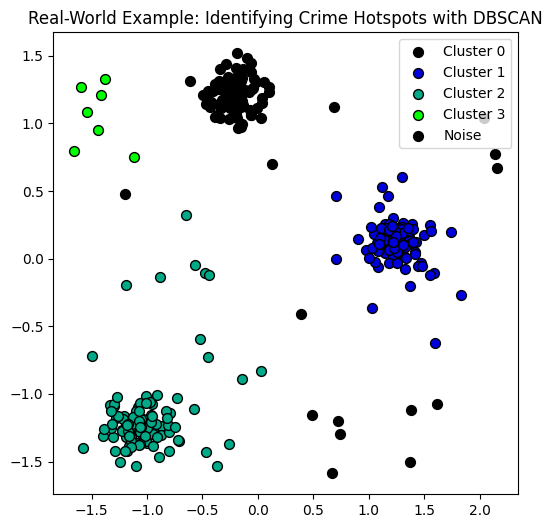

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
unique_labels_crime = set(crime_labels)

# Assign colors to clusters
colors = [plt.cm.nipy_spectral(float(i) / (len(unique_labels_crime) if len(unique_labels_crime) > 0 else 1)) for i in unique_labels_crime]

for k, col in zip(unique_labels_crime, colors):
    if k == -1:
        col = (0, 0, 0, 1)  # Black for noise
    class_member_mask = (crime_labels == k)
    plt.scatter(crime_data_std[class_member_mask, 0], crime_data_std[class_member_mask, 1], c=[col], edgecolors='k', s=50, label=f'Cluster {k}' if k != -1 else 'Noise')

plt.title('Real-World Example: Identifying Crime Hotspots with DBSCAN')
plt.legend()
plt.show()


## 📌 Step 6: Interpreting the Results  

### 🔍 Key Observations:  
1. **High-Density Crime Areas (Clusters)**  
   - DBSCAN successfully groups **frequent crime locations** into distinct clusters.  

2. **Outliers (Noise Points)**  
   - Isolated crimes **are not assigned to any cluster** and appear as black points.  
   - This helps in identifying **one-off crime events** that may require separate investigation.  

3. **Adjusting Parameters (`eps` & `min_samples`)**  
   - Increasing `eps` makes clusters **larger**, but might misclassify noise.  
   - Reducing `eps` makes clusters **tighter**, but might increase the number of noise points.  

### 🏆 Real-World Application:  
🚔 **Law enforcement agencies** can use DBSCAN to:  
✅ Detect high-crime areas (hotspots).  
✅ Allocate **police resources efficiently**.  
✅ Identify **unusual isolated crime patterns**.  

---



#📌 New Application: Detecting Mobile Money Fraud in Nigeria
Real-World Problem:
📱 In Nigeria, mobile money transactions are widely used for payments, transfers, and savings. However, fraudsters exploit the system by making suspicious transactions that differ from normal user behavior.

🔍 How can DBSCAN help?

Identifies clusters of normal transactions (legitimate users).
Flags isolated transactions (potential fraud).
Helps banks and fintech companies (e.g., Opay, PalmPay, Moniepoint) to detect fraudulent activities automatically.

## 💳 Step 1: Generating Synthetic Mobile Money Transactions  

- Nigerian fintech companies process millions of **mobile money transactions daily**.  
- We simulate **normal transactions** where customers send money **within a reasonable range**.  
- We add **fraudulent transactions**, which tend to be **isolated and unusual** (e.g., extremely high amounts).  
- This dataset will help us use DBSCAN to **detect fraudulent activities**.


In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)

# Simulating normal transactions
normal_transactions = np.random.normal(loc=5000, scale=1000, size=(250, 2))  # Amounts around ₦5000

# Simulating fraudulent transactions (outliers)
fraud_transactions = np.array([
    [50000, 10000],  # ₦50,000 transaction (high amount)
    [70000, 15000],  # ₦70,000 transaction (high amount)
    [85000, 12000],  # ₦85,000 transaction
])

# Combining both datasets
transactions = np.vstack([normal_transactions, fraud_transactions])

# Creating a Pandas DataFrame
df = pd.DataFrame(transactions, columns=["Amount Sent (₦)", "Amount Received (₦)"])
df.head()


,Amount Sent (₦),Amount Received (₦)
0,5496.714153,4861.735699
1,5647.688538,6523.029856
2,4765.846625,4765.863043
3,6579.212816,5767.434729
4,4530.525614,5542.560044


## 🚨 Step 2: Applying DBSCAN to Detect Fraud  

- We apply **DBSCAN clustering** to find fraudulent transactions.  
- **Normal transactions** will form clusters.  
- **Fraudulent transactions** will be classified as **outliers (noise)**.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Standardize transaction amounts
transactions_std = StandardScaler().fit_transform(transactions)

# Apply DBSCAN
dbscan_fraud = DBSCAN(eps=0.5, min_samples=5)
fraud_labels = dbscan_fraud.fit_predict(transactions_std)


## 📊 Step 3: Visualizing Fraud Detection Results  

- Each **color** represents a different cluster of normal transactions.  
- **Black points** represent **flagged fraud transactions** (outliers).  
- If a transaction **does not belong to any cluster**, it is likely **fraudulent**.


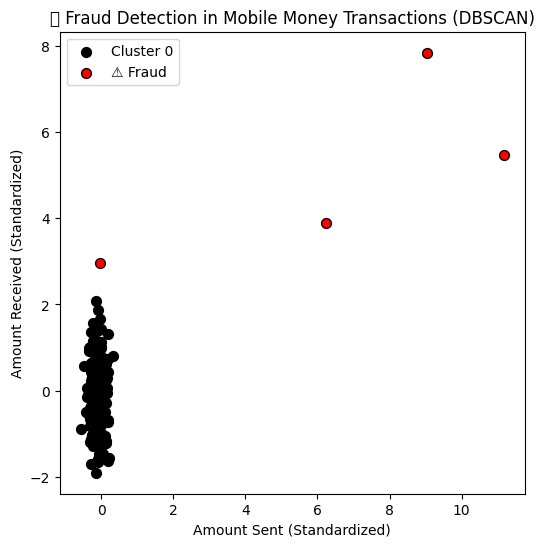

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
unique_labels_fraud = set(fraud_labels)

# Assign colors to clusters
colors = [plt.cm.nipy_spectral(float(i) / (len(unique_labels_fraud) if len(unique_labels_fraud) > 0 else 1)) for i in unique_labels_fraud]

for k, col in zip(unique_labels_fraud, colors):
    if k == -1:
        col = 'red'  # Fraud cases in RED
    class_member_mask = (fraud_labels == k)
    plt.scatter(transactions_std[class_member_mask, 0], transactions_std[class_member_mask, 1],
                c=[col], edgecolors='k', s=50,
                label=f'Cluster {k}' if k != -1 else '⚠️ Fraud')

plt.title('📌 Fraud Detection in Mobile Money Transactions (DBSCAN)')
plt.xlabel("Amount Sent (Standardized)")
plt.ylabel("Amount Received (Standardized)")
plt.legend()
plt.show()


## 🏆 Step 4: Interpreting the Results  

### 🔍 Key Observations:  
1️⃣ **Clusters of Normal Transactions**  
   - DBSCAN groups most transactions into **clusters**, representing normal spending patterns.  

2️⃣ **Fraudulent Transactions (Noise)**  
   - Transactions **with extremely high amounts** (e.g., ₦50,000+) appear **as outliers (black points)**.  
   - These transactions differ **significantly from regular transactions** and should be investigated.  

3️⃣ **Real-World Applications**  
🏦 **Banks and Fintech Companies** (Opay, Kuda, PalmPay, Moniepoint) can use this approach to:  
✅ Automatically **flag suspicious transactions**.  
✅ Detect **unusual spending patterns** before fraud occurs.  
✅ Reduce **fraud losses** by analyzing customer behavior.  

🚀 **Try adjusting the DBSCAN parameters (`eps`, `min_samples`)** and see how fraud detection changes!


## **🔍 How to Determine the Optimal Number of Clusters in DBSCAN?**
Unlike K-Means, **DBSCAN does not require specifying the number of clusters (`K`) in advance**. Instead, it groups data points based on density, which makes it ideal for **detecting irregular patterns, noise, and outliers**.

However, choosing the **right `eps` (epsilon) and `min_samples` parameters** is crucial for obtaining meaningful clusters.

---

## **📌 Finding the Optimal `eps`**
The `eps` parameter defines the **maximum distance** between two points for them to be considered neighbors. Choosing the right `eps` ensures that:
- **Clusters are well-formed** (not too sparse or too dense).
- **Noise points (outliers) are correctly identified**.
- **The algorithm detects the natural structure in the data**.

### **Method: K-Distance Plot (Elbow Method for DBSCAN)**
To determine `eps`, we use a **K-Distance Plot**, which works as follows:
1. **Find the distance to the `k` nearest neighbors** for each data point (`k = min_samples`).
2. **Sort these distances in ascending order**.
3. **Plot the sorted distances**.  
   - The "elbow" or "knee" point in the curve suggests a good `eps` value.

---

## **📊 K-Distance Plot: Visualizing `eps`**
A K-Distance plot typically looks like this:




- The sharp **bend (elbow)** in the curve represents a good choice for `eps`.
- Points **before the bend** are too close, leading to **over-clustering**.
- Points **after the bend** are too far apart, leading to **under-clustering**.

---

## **📌 Finding `min_samples`**
The `min_samples` parameter defines the **minimum number of points** required to form a cluster.
- A general rule: **Set `min_samples` ≈ Dimensionality of the data (`D`) × 2**  
  - For **2D data**, use **`min_samples = 4 or 5`**.
  - For **high-dimensional data**, use **higher values**.

---

## **🔹 Summary**
✅ **DBSCAN is automatic, but tuning `eps` is key.**  
✅ **Use a K-Distance Plot to determine the best `eps`.**  
✅ **Choose `min_samples` based on the data’s dimensionality.**  
✅ **DBSCAN is great for detecting anomalies and irregular clusters.**  

Would you like to include an **interactive slider to adjust `eps` dynamically**? 🚀


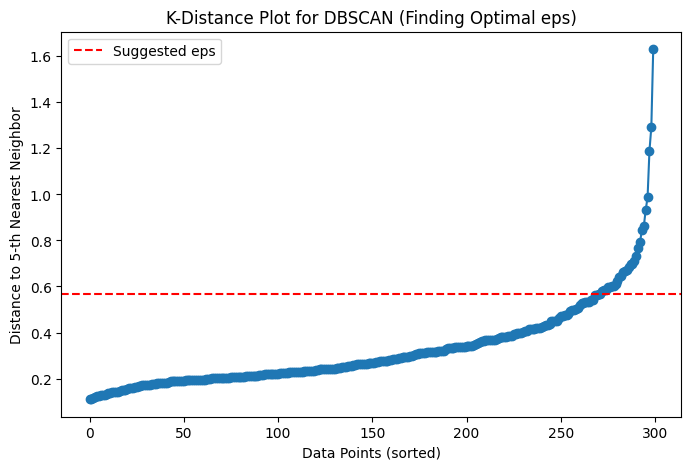

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Fit Nearest Neighbors model
k = 5  # Set min_samples for DBSCAN
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X)

# Compute distances to the k-th nearest neighbor
distances, indices = neigh.kneighbors(X)
distances = np.sort(distances[:, k-1])  # Sort distances of the k-th neighbor

# Plot the K-Distance Graph
plt.figure(figsize=(8, 5))
plt.plot(distances, marker='o', linestyle='-')
plt.xlabel("Data Points (sorted)")
plt.ylabel(f"Distance to {k}-th Nearest Neighbor")
plt.title("K-Distance Plot for DBSCAN (Finding Optimal eps)")
plt.axhline(y=distances[int(len(distances) * 0.9)], color='r', linestyle='--', label="Suggested eps")
plt.legend()
plt.show()
